# Business Problem

1. **Objective**
   - To classifiy an image into 3 categories: Driving License, Social Security Card, Other
   - Learn from images and its properties to classify into the respective categories better


2. **Machine Learning Problem**
   - Develop a machine learning model based on convolution neural network to learn properties of the 3 categories of images and predict accurately for new image


3. **Technology**
   - Python, Scikit-learn, tensorflow, keras, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t classification accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time to classify images



**Dataset**<br>
driving_license images<br>
social_security images<br>
other images<br>

In [ ]:
!pip install numpy==1.21.5
!pip install keras==2.7.0
!pip install tensorflow==2.7.0
!pip install matplotlib==3.5.1

In [3]:
import numpy as np
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [4]:
data_dir = pathlib.Path("input/Training_data/")

In [5]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

600


In [6]:
driving_license = list(data_dir.glob('driving_license/*'))
social_security = list(data_dir.glob('social_security/*'))
others = list(data_dir.glob('others/*'))

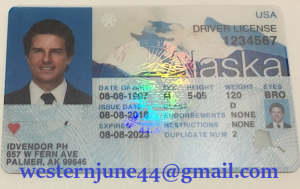

In [7]:
PIL.Image.open(str(driving_license[2]))

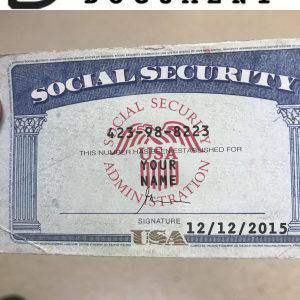

In [8]:
PIL.Image.open(str(social_security[10]))

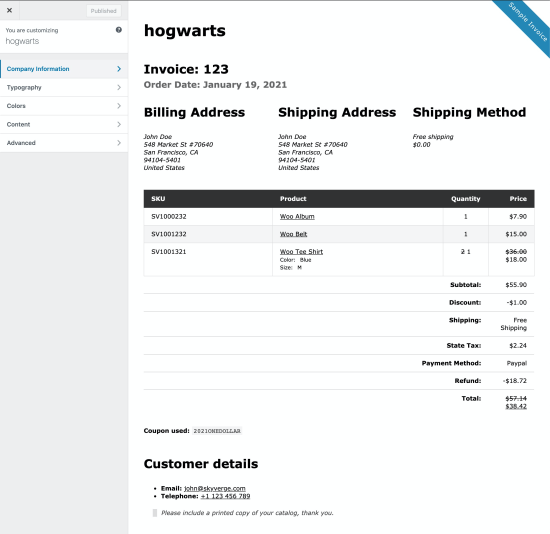

In [9]:
PIL.Image.open(str(others[140]))

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 480 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['driving_license', 'others', 'social_security']


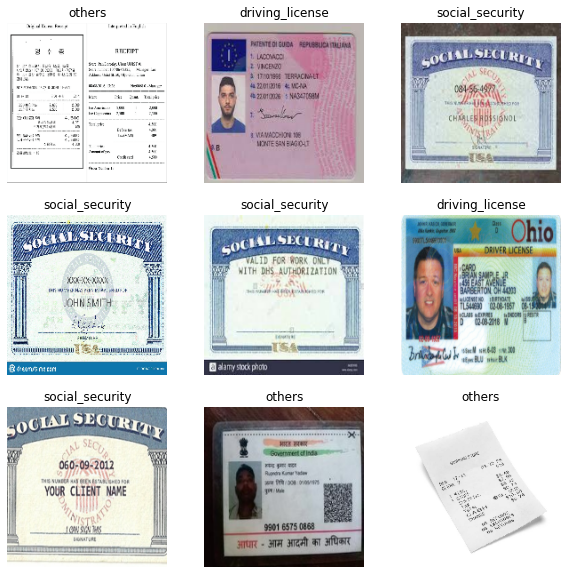

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.011843118 1.0


In [19]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [22]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
15/15 [==============================] - 6s 371ms/step - loss: 1.0369 - accuracy: 0.5333 - val_loss: 0.6084 - val_accuracy: 0.8167
Epoch 2/20
15/15 [==============================] - 4s 287ms/step - loss: 0.4465 - accuracy: 0.8229 - val_loss: 0.6956 - val_accuracy: 0.7583
Epoch 3/20
15/15 [==============================] - 4s 288ms/step - loss: 0.3125 - accuracy: 0.8792 - val_loss: 0.3503 - val_accuracy: 0.8833
Epoch 4/20
15/15 [==============================] - 4s 284ms/step - loss: 0.1991 - accuracy: 0.9375 - val_loss: 0.6985 - val_accuracy: 0.7667
Epoch 5/20
15/15 [==============================] - 4s 281ms/step - loss: 0.1341 - accuracy: 0.9583 - val_loss: 0.3480 - val_accuracy: 0.8917
Epoch 6/20
15/15 [==============================] - 4s 279ms/step - loss: 0.0622 - accuracy: 0.9812 - val_loss: 0.2912 - val_accuracy: 0.9250
Epoch 7/20
15/15 [==============================] - 4s 279ms/step - loss: 0.0831 - accuracy: 0.9708 - val_loss: 0.2990 - val_accuracy: 0.9250
Epoch 

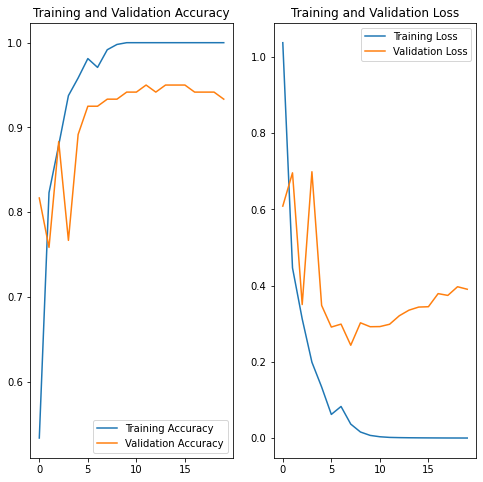

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

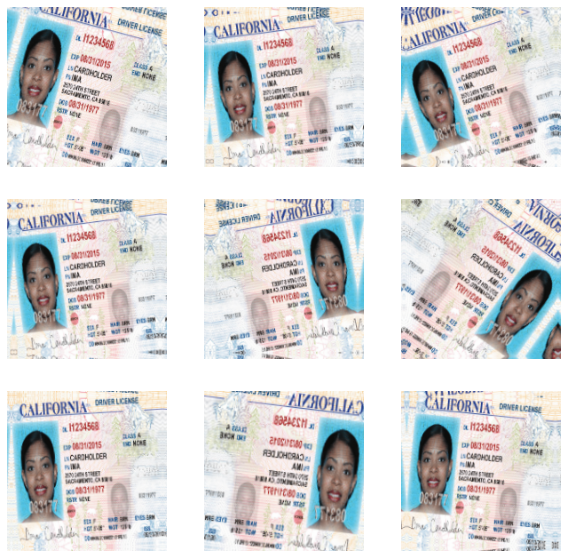

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [29]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
15/15 [==============================] - 6s 357ms/step - loss: 1.1753 - accuracy: 0.3542 - val_loss: 1.0282 - val_accuracy: 0.5417
Epoch 2/30
15/15 [==============================] - 5s 333ms/step - loss: 0.8981 - accuracy: 0.6479 - val_loss: 0.6566 - val_accuracy: 0.6917
Epoch 3/30
15/15 [==============================] - 5s 334ms/step - loss: 0.7042 - accuracy: 0.7104 - val_loss: 0.9582 - val_accuracy: 0.5500
Epoch 4/30
15/15 [==============================] - 5s 332ms/step - loss: 0.5882 - accuracy: 0.7812 - val_loss: 0.4768 - val_accuracy: 0.8000
Epoch 5/30
15/15 [==============================] - 6s 371ms/step - loss: 0.4626 - accuracy: 0.8167 - val_loss: 0.4392 - val_accuracy: 0.8333
Epoch 6/30
15/15 [==============================] - 6s 420ms/step - loss: 0.4201 - accuracy: 0.8146 - val_loss: 0.4713 - val_accuracy: 0.8333
Epoch 7/30
15/15 [==============================] - 6s 406ms/step - loss: 0.4010 - accuracy: 0.8313 - val_loss: 0.4974 - val_accuracy: 0.7583
Epoch 

In [ ]:
#model.save("cnn-model.h5")

In [30]:
model = tf.keras.models.load_model("output/cnn-model.h5")

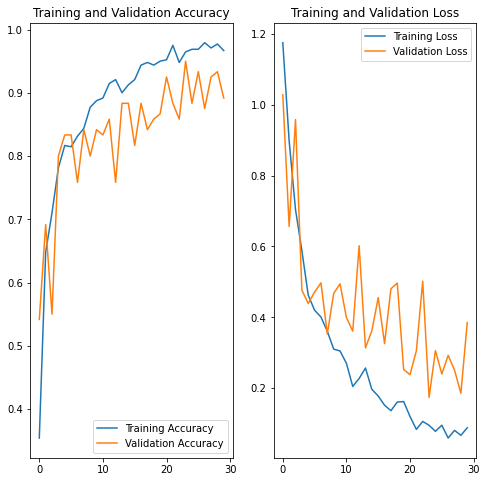

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Prediction

In [32]:
test_data_dir = pathlib.Path("input/Testing_Data//")

In [33]:
image_count = len(list(test_data_dir.glob('*/*')))
print(image_count)

150


In [34]:
test_driving_license = list(test_data_dir.glob('driving_license/*'))
test_social_security = list(test_data_dir.glob('social_security/*'))
test_others = list(test_data_dir.glob('others/*'))

In [35]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 150 files belonging to 3 classes.


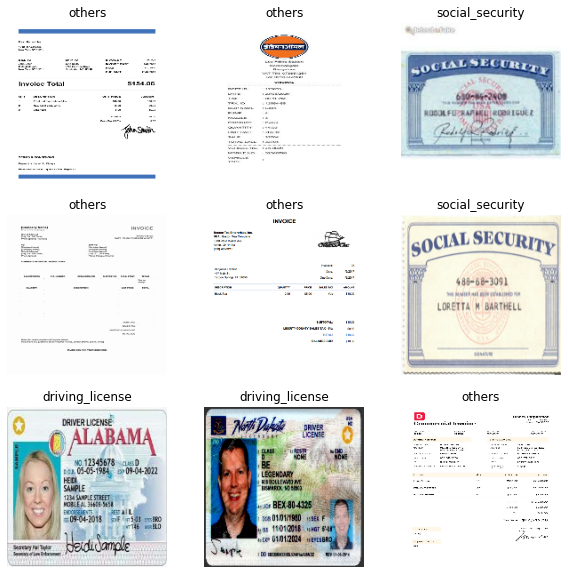

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [37]:
model.evaluate(test_ds)

5/5 [==============================] - 1s 66ms/step - loss: 1.0168 - accuracy: 0.3467


[1.0167529582977295, 0.3466666638851166]

In [38]:
img = tf.keras.utils.load_img(
    "input/Testing_Data/others/111.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [39]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to social_security with a 39.27 percent confidence.
